<a href="https://colab.research.google.com/github/helsach/2025_pengolahan_citra_ti2b/blob/main/Jobsheet_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet Minggu 01 - Dasar Berkas Gambar

## P1. Mendefinisikan Istilah bit, byte, kilobyte, megabyte dll pada citra

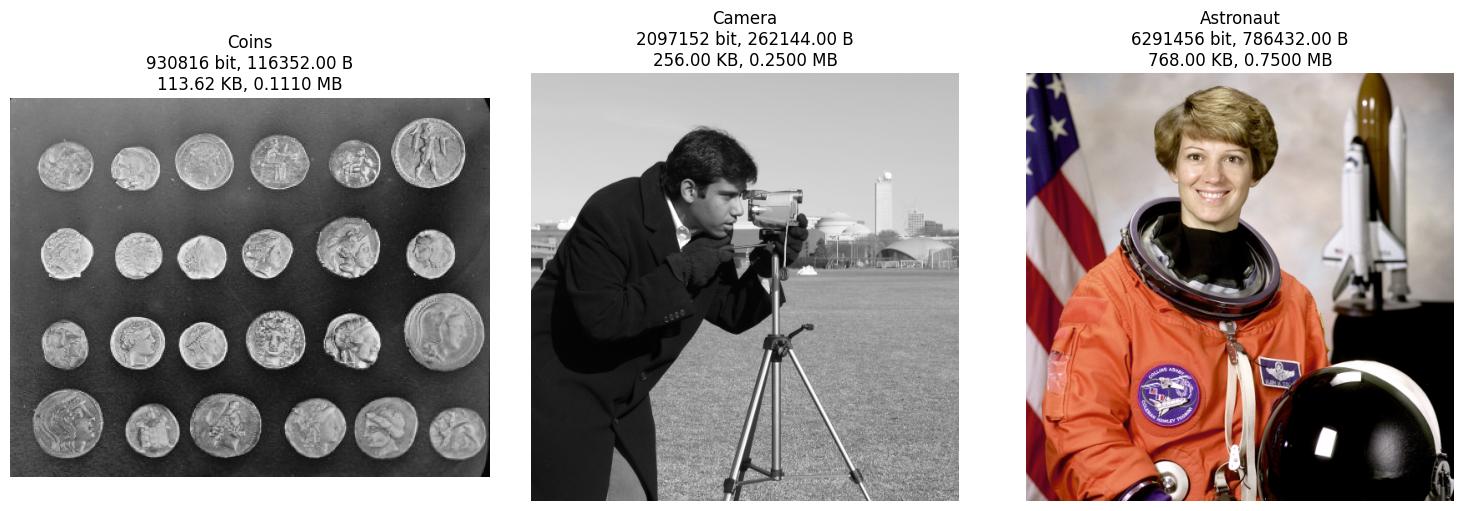

In [ ]:
from os import SCHED_BATCH
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Contoh gambar dari scikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menghitung ukuran gambar dalam bit, byte, KB, MB
def hitung_ukuran(image):
  bit_per_pixel = 8 if len(image.shape) == 2 else 24 #Grayscale = 8 bit, RGB = 24 bit
  total_pixels = image.shape[0] * image.shape[1]
  total_bits = total_pixels * bit_per_pixel
  total_bytes = total_bits / 8
  total_kb = total_bytes / 1024
  total_mb = total_kb / 1024
  return total_bits, total_bytes, total_kb, total_mb

# Menyusun gambar dan ukurannya dalam satu baris
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Daftar gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  bits, bytes_, kb, mb = hitung_ukuran(img)
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
  ax.axis('off')

plt.tight_layout()
plt.show()


## P2. Citra digital tersusun dari beberapa pixel

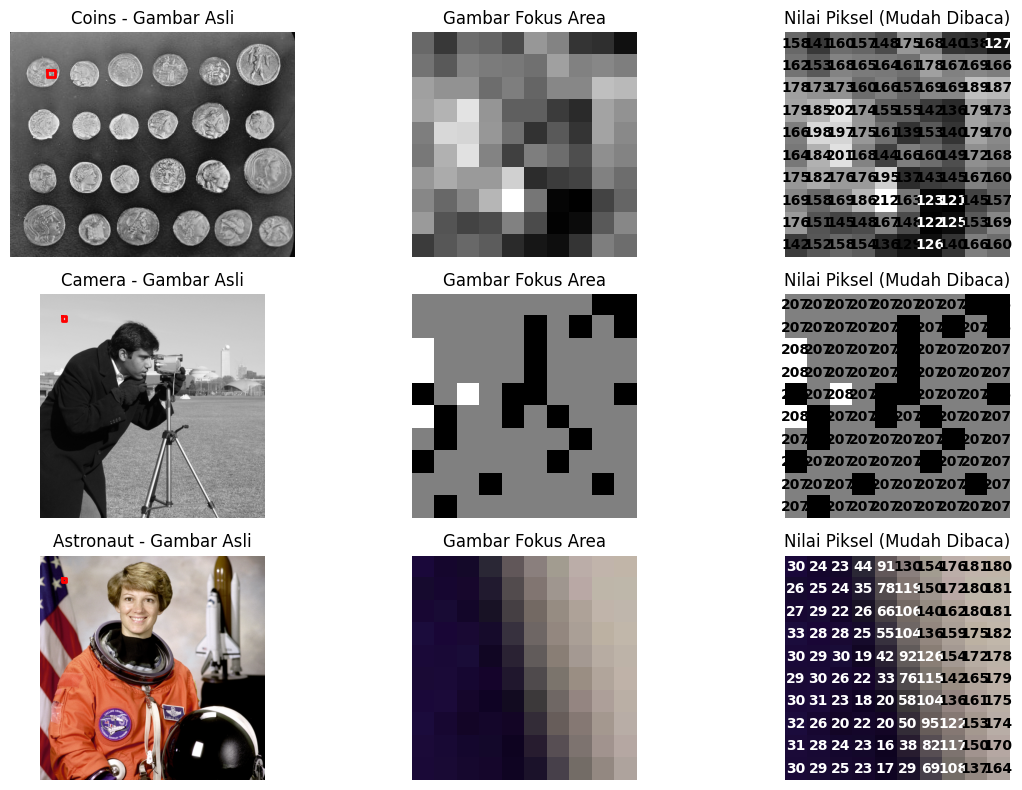

In [15]:
# List gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

# Koordinat area kecil yang di-zoom
x_start, x_end = 50, 60
y_start, y_end = 50, 60

fig, axes = plt.subplots(len(gambar_list), 3, figsize=(12, 8))

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
    # Gambar asli
    axes[i, 0].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    axes[i, 0].set_title(f"{nama} - Gambar Asli")
    axes[i, 0].axis('off')

    # Tambahkan kotak merah untuk menunjukkan area yang difokuskan
    rect_x = [x_start, x_end, x_end, x_start, x_start]
    rect_y = [y_start, y_start, y_end, y_end, y_start]
    axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

    # Gambar fokus area
    zoomed_img = img[y_start:y_end, x_start:x_end]
    axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
    axes[i, 1].set_title("Gambar Fokus Area")
    axes[i, 1].axis('off')

    # Menampilkan nilai piksel dalam area yang di-zoom
    axes[i, 2].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

    for y in range(zoomed_img.shape[0]):
        for x in range(zoomed_img.shape[1]):
            if len(img.shape) == 3:  # Jika RGB, ambil nilai rata-rata piksel untuk tampilan angka
                pixel_value = int(np.mean(zoomed_img[y, x]))
            else:
                pixel_value = zoomed_img[y, x]

            # Pilih warna teks agar mudah dibaca di latar belakang
            text_color = "white" if pixel_value < 128 else "black"
            axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center', fontsize=10, fontweight='bold')

    axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


## P3. Citra disimpan dalam Array


=== Coins ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (303, 384)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama):
[[ 47 123 133 129 137]
 [ 93 144 145 143 145]
 [126 147 143 147 145]
 [131 136 133 139 136]
 [131 133 134 135 129]]

=== Camera ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama):
[[200 200 200 200 199]
 [200 199 199 200 199]
 [199 199 199 200 200]
 [200 200 199 199 199]
 [200 200 200 200 199]]

=== Astronaut ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512, 3)
Tipe Nilai Piksel: uint8
Contoh nilai piksel (5x5 pertama):
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  [ 54  51  98]
  [ 76  76 106]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  [106 107 120]
  [128 128 131]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  [159 157 157]
  [167 165 161]]

 [[220 213 210]
  [214 206 206]
  [202 198 196]
  [197 191 193]
  [200 194 196]]

 [[232 223 223]
  [226 220 215]
  [221 215

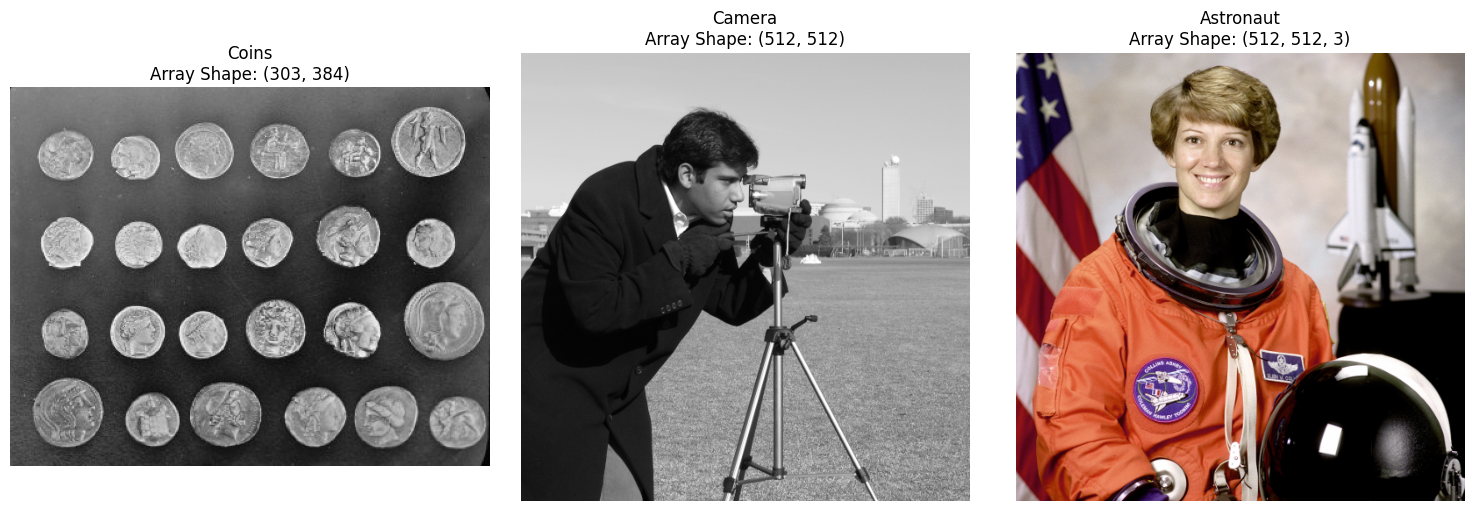

In [16]:
# Menjelaskan bagaimana citra disimpan dalam array NumPy

import numpy as np

# Memuat gambar dari scikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menampilkan informasi array NumPy dari gambar
def info_array_numpy(image, nama):
    print(f"\n=== {nama} ===")
    print(f"Tipe Data: {type(image)}")  # Harusnya <class 'numpy.ndarray'>
    print(f"Dimensi: {image.shape}")  # Menampilkan dimensi gambar (height, width, channels jika RGB)
    print(f"Tipe Nilai Piksel: {image.dtype}")  # Menampilkan tipe data dalam array (uint8)

    # Menampilkan sebagian kecil dari array (5x5 piksel pertama)
    print("Contoh nilai piksel (5x5 pertama):")
    print(image[:5, :5] if len(image.shape) == 2 else image[:5, :5, :])

# Menampilkan informasi setiap gambar
info_array_numpy(gambar_coins, "Coins")
info_array_numpy(gambar_camera, "Camera")
info_array_numpy(gambar_astronaut, "Astronaut")

# Visualisasi bagaimana array NumPy mewakili citra
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(f"{nama}\nArray Shape: {img.shape}")
    ax.axis('off')

plt.tight_layout()
plt.show()


## P4. Sistem Koordinat Kiri Atas Dalam Citra Digital.

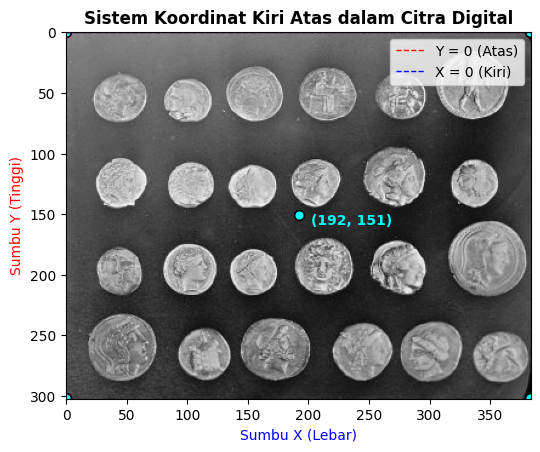

In [21]:
# Menjelaskan sistem koordinat kiri atas dalam citra digital dengan warna anotasu yang lebih kontras

# Pilih salah satu gambar untuk contoh koordinat
gambar_sample = data.coins()

# Ukuran gambar
height, width = gambar_sample.shape

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))

# Tampilkan gambar
ax.imshow (gambar_sample, cmap='gray')

# Tambahkan anotasi dengan koordinat
ax.set_title("Sistem Koordinat Kiri Atas dalam Citra Digital", fontsize=12, fontweight="bold")
ax.set_xlabel("Sumbu X (Lebar)", fontsize=10, color="blue")
ax.set_ylabel("Sumbu Y (Tinggi)", fontsize=10, color='red')

# Tambahkan garis koordinat utama
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, label="Y = 0 (Atas)")
ax.axhline(y=0, color='blue', linestyle='--', linewidth=1, label="X = 0 (Kiri)")

# Tambahkan beberapa titik koordinat penting dengan warna kontras (cyan)
koordinat_titik = [(0, 0), (width-1, 0), (0, height-1), (width-1, height-1), (width//2, height//2)]
for x, y in koordinat_titik:
  ax.scatter(x, y, color='cyan', s=50, edgecolors='black', linewidth=1.2)  # Titik dengan outline hitam

ax.text(x + 10, y + 10, f"({x}, {y})", color="cyan", fontsize=10,
fontweight="bold", ha="left", va="bottom")

# Tambahkan legenda
ax.legend(loc="upper right")

plt.show()



## P5. Warna RGB dalam citra digital

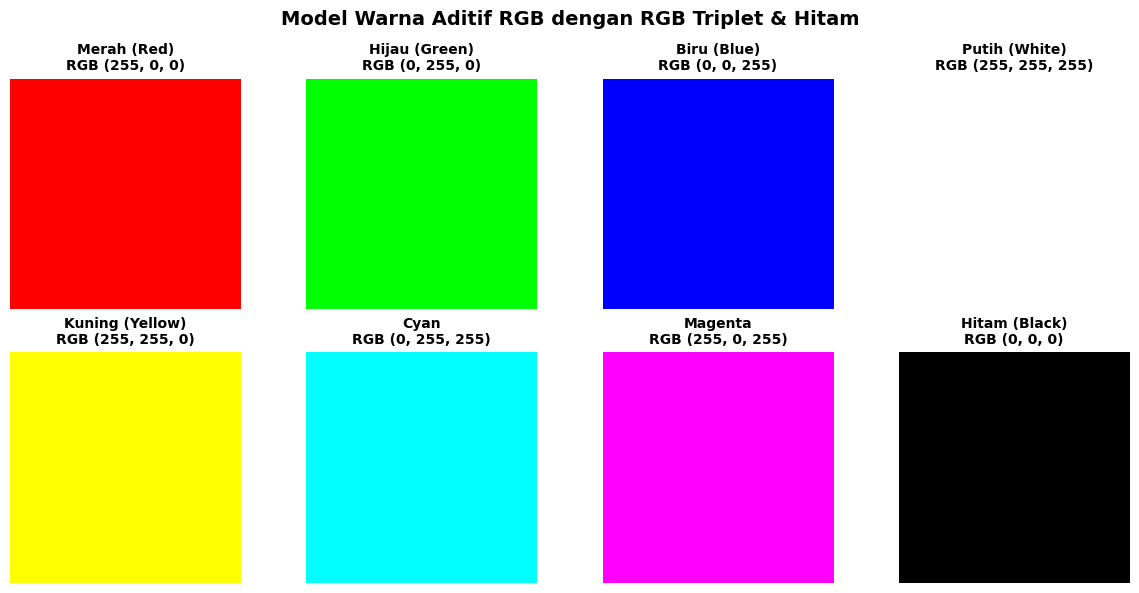

In [26]:
# Menjelaskan model warna aditif RGB dalam citra digital dengan RGB Triplet dan warna hitam

# Membuat tiga kanal warna utama dalam model RGB
red_channel = np.zeros((100, 100, 3), dtype=np.uint8)
green_channel = np.zeros((100, 100, 3), dtype=np.uint8)
blue_channel = np.zeros((100, 100, 3), dtype=np.uint8)

# Mengatur warna merah, hijau, dan biru murni
red_channel[:, :, 0] = 255  # (255, 0, 0) - Merah
green_channel[:, :, 1] = 255  # (0, 255, 0) - Hijau
blue_channel[:, :, 2] = 255  # (0, 0, 255) - Biru

# Membuat kombinasi warna dari RGB
yellow = red_channel + green_channel  # (255, 255, 0) - Kuning
cyan = green_channel + blue_channel  # (0, 255, 255) - Cyan
magenta = red_channel + blue_channel  # (255, 0, 255) - Magenta
white = red_channel + green_channel + blue_channel  # (255, 255, 255) - Putih
black = np.zeros((100, 100, 3), dtype=np.uint8)  # (0, 0, 0) - Hitam

# Menampilkan hasil dengan RGB Triplet
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# List gambar, nama warna, dan RGB triplet
color_list = [red_channel, green_channel, blue_channel, white, yellow, cyan, magenta, black]
color_names = ["Merah (Red)", "Hijau (Green)", "Biru (Blue)", "Putih (White)", "Kuning (Yellow)", "Cyan", "Magenta", "Hitam (Black)"]
rgb_values = ["(255, 0, 0)", "(0, 255, 0)", "(0, 0, 255)", "(255, 255, 255)", "(255, 255, 0)", "(0, 255, 255)", "(255, 0, 255)", "(0, 0, 0)"]

# Plot warna primer, hasil campuran, dan hitam dengan RGB triplet
for ax, color, name, rgb in zip(axes.flat, color_list, color_names, rgb_values):
    ax.imshow(color)
    ax.set_title(f"{name}\nRGB {rgb}", fontsize=10, fontweight="bold")
    ax.axis('off')

plt.suptitle("Model Warna Aditif RGB dengan RGB Triplet & Hitam", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

## P6. urutan tiga nilai warna dalam citra scikit-image.

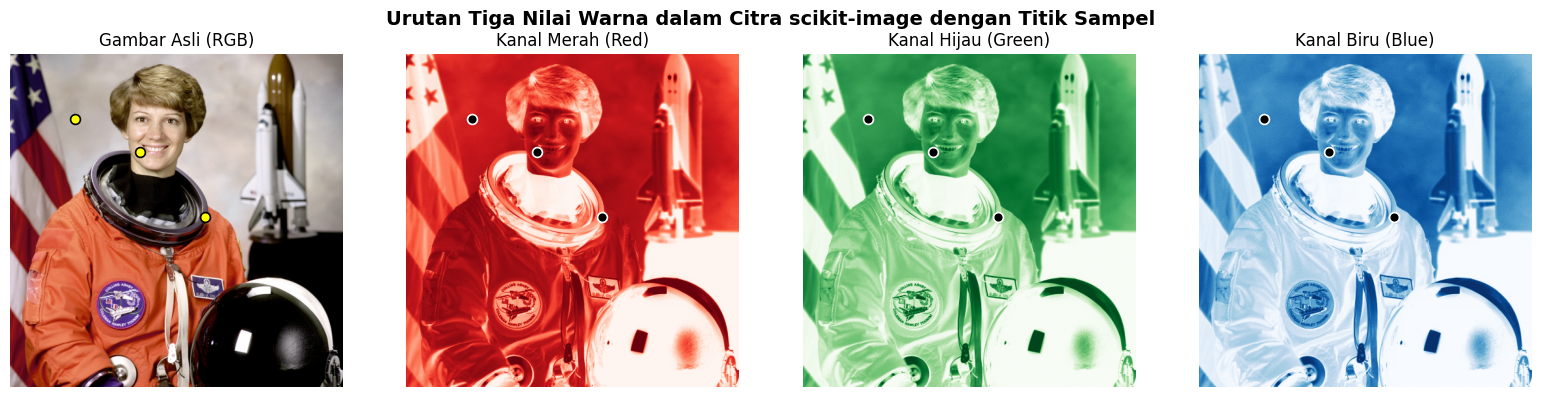

Nilai RGB pada titik koordinat yang dipilih:
Titik 1 - Koordinat (100, 100):
 Red (Merah) : 187
 Green (Hijau) : 176
 Blue (Biru)  : 169
 RGB Triplet  : (187, 176, 169)

Titik 2 - Koordinat (200, 150):
 Red (Merah) : 236
 Green (Hijau) : 210
 Blue (Biru)  : 184
 RGB Triplet  : (236, 210, 184)

Titik 3 - Koordinat (300, 250):
 Red (Merah) : 96
 Green (Hijau) : 76
 Blue (Biru)  : 93
 RGB Triplet  : (96, 76, 93)



In [27]:
# Menjelaskan urutan tiga nilai warna dalam citra scikit-image dengan titik penanda koordinat piksel
import matplotlib.pyplot as plt
from skimage import data

# Memuat gambar RGB dari scikit-image
gambar_rgb = data.astronaut()  # Gambar astronaut dalam format RGB

# Ekstrak tiga kanal warna (R, G, B)
red_channel = gambar_rgb[:, :, 0]  # Kanal merah
green_channel = gambar_rgb[:, :, 1]  # Kanal hijau
blue_channel = gambar_rgb[:, :, 2]  # Kanal biru

# Koordinat tiga titik sampel untuk menampilkan nilai piksel RGB
titik_koordinat = [(100, 100), (200, 150), (300, 250)]

# Menampilkan gambar asli dan masing-masing kanal warna
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Tampilkan gambar asli dengan titik penanda
axes[0].imshow(gambar_rgb)
axes[0].set_title("Gambar Asli (RGB)")
for x, y in titik_koordinat:
    axes[0].scatter(x, y, color='yellow', s=50, edgecolors='black', linewidth=1.2)  # Titik dengan outline hitam

# Tampilkan kanal merah dengan titik
axes[1].imshow(red_channel, cmap="Reds")
axes[1].set_title("Kanal Merah (Red)")
for x, y in titik_koordinat:
    axes[1].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

# Tampilkan kanal hijau dengan titik
axes[2].imshow(green_channel, cmap="Greens")
axes[2].set_title("Kanal Hijau (Green)")
for x, y in titik_koordinat:
    axes[2].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

# Tampilkan kanal biru dengan titik
axes[3].imshow(blue_channel, cmap="Blues")
axes[3].set_title("Kanal Biru (Blue)")
for x, y in titik_koordinat:
    axes[3].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)

# Hilangkan sumbu koordinat
for ax in axes:
    ax.axis("off")

plt.suptitle("Urutan Tiga Nilai Warna dalam Citra scikit-image dengan Titik Sampel", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Menampilkan contoh nilai piksel untuk titik-titik yang dipilih
print("Nilai RGB pada titik koordinat yang dipilih:")
for i, (x, y) in enumerate(titik_koordinat):
    r_val, g_val, b_val = gambar_rgb[y, x, 0], gambar_rgb[y, x, 1], gambar_rgb[y, x, 2]
    print(f"Titik {i+1} - Koordinat ({x}, {y}):")
    print(f" Red (Merah) : {r_val}")
    print(f" Green (Hijau) : {g_val}")
    print(f" Blue (Biru)  : {b_val}")
    print(f" RGB Triplet  : ({r_val}, {g_val}, {b_val})\n")